<a href="https://colab.research.google.com/github/toshNaik/English-German/blob/master/Nein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip drive/My\ Drive/english-german/deu-eng.zip

Archive:  drive/My Drive/english-german/deu-eng.zip
  inflating: deu.txt                 
  inflating: _about.txt              


In [3]:
import pandas as pd
import numpy as np

In [4]:
file1 = open('deu.txt', 'r')
dataset = []
for line in file1.readlines():
  dataset.append(line)
file1.close()

In [5]:
import re

In [6]:
eng, deu, _ = re.split('\t', dataset[0])
print(eng)
print(deu)

Go.
Geh.


In [7]:
eng = []
deu = []
for line in dataset:
  english, deutsche, _ = re.split('\t', line)
  english = re.sub(r'[^\w\s]', '', english)   #remove punctuation
  deutsche = re.sub(r'[^\w\s]', '', deutsche)
  english = re.sub(r'\d', '', english)        #remove digits
  deutsche = re.sub(r'\d', '', deutsche)
  eng.append(english.lower())
  deu.append(deutsche.lower()+' <EOS>')

In [8]:
print(eng[125])
print(deu[125])

come on
komm <EOS>


In [9]:
eng_data = pd.Series(eng)
deu_data = pd.Series(deu)
deu_input_data = deu_data.copy().apply(lambda x: '<BOS>' + x)

In [71]:
eng_data.tail(5)

217027    even if some sentences by nonnative speakers a...
217028    if someone who doesnt know your background say...
217029    if someone who doesnt know your background say...
217030    if someone who doesnt know your background say...
217031    doubtless there exists in this world precisely...
dtype: object

In [11]:
deu_data.head(-10)

0                                                 geh <EOS>
1                                               hallo <EOS>
2                                           grüß gott <EOS>
3                                                lauf <EOS>
4                                                lauf <EOS>
                                ...                        
217017    tom fiel vor den augen aller im restaurant auf...
217018    tom warf mitten in der nacht steine an marias ...
217019    elektronische zigaretten werden als gesunde al...
217020    tom sagte du kannst deiner freundin den letzte...
217021    ich empfehle muttersprachliche sätze beizutrag...
Length: 217022, dtype: object

In [12]:
deu_input_data.head(10)

0             <BOS>geh <EOS>
1           <BOS>hallo <EOS>
2       <BOS>grüß gott <EOS>
3            <BOS>lauf <EOS>
4            <BOS>lauf <EOS>
5      <BOS>potzdonner <EOS>
6    <BOS>donnerwetter <EOS>
7           <BOS>feuer <EOS>
8           <BOS>hilfe <EOS>
9         <BOS>zu hülf <EOS>
dtype: object

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize(data):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(data)
  return tokenizer

In [14]:
english_tokenizer = tokenize(eng_data.values)
english_vocab_size = len(english_tokenizer.word_index) + 1
print(f'English vocab size {english_vocab_size}')

german_tokenizer = tokenize(deu_input_data.values)
german_vocab_size = len(german_tokenizer.word_index) + 1
print(f'German vocab size {german_vocab_size}')

English vocab size 16187
German vocab size 34990


In [15]:
eng_tokens = english_tokenizer.texts_to_sequences(eng_data.values)
deu_tokens_output = german_tokenizer.texts_to_sequences(deu_data.values)
deu_tokens_input = german_tokenizer.texts_to_sequences(deu_input_data.values)

In [16]:
english_padded = pad_sequences(eng_tokens, padding='post')
print(f'English padded: {english_padded.shape}')
german_padded_input = pad_sequences(deu_tokens_input, padding='post')
print(f'German input padded: {german_padded_input.shape}')
german_padded_output = pad_sequences(deu_tokens_output, padding='post', maxlen = german_padded_input.shape[1])
print(f'German output padded: {german_padded_output.shape}')

English padded: (217032, 101)
German input padded: (217032, 77)
German output padded: (217032, 77)


In [19]:
german_padded_input

array([[   1,  609,    2, ...,    0,    0,    0],
       [   1, 1671,    2, ...,    0,    0,    0],
       [   1, 4399, 1531, ...,    0,    0,    0],
       ...,
       [   1,   60,  249, ...,    0,    0,    0],
       [   1,   60,  249, ...,    0,    0,    0],
       [   1,  203, 1449, ..., 1846,    6,    2]], dtype=int32)

In [21]:
german_padded_output

array([[  609,     2,     0, ...,     0,     0,     0],
       [ 1671,     2,     0, ...,     0,     0,     0],
       [ 4399,  1531,     2, ...,     0,     0,     0],
       ...,
       [   60,   249, 11659, ...,     0,     0,     0],
       [   60,   249,    14, ...,     0,     0,     0],
       [  203,  1449,   895, ...,     6,     2,     0]], dtype=int32)

In [22]:
german_padded_output = german_padded_output.reshape(german_padded_output.shape[0], german_padded_output.shape[1], 1)
print(german_padded_output)

[[[  609]
  [    2]
  [    0]
  ...
  [    0]
  [    0]
  [    0]]

 [[ 1671]
  [    2]
  [    0]
  ...
  [    0]
  [    0]
  [    0]]

 [[ 4399]
  [ 1531]
  [    2]
  ...
  [    0]
  [    0]
  [    0]]

 ...

 [[   60]
  [  249]
  [11659]
  ...
  [    0]
  [    0]
  [    0]]

 [[   60]
  [  249]
  [   14]
  ...
  [    0]
  [    0]
  [    0]]

 [[  203]
  [ 1449]
  [  895]
  ...
  [    6]
  [    2]
  [    0]]]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((english_padded, german_padded_input), axis =1), german_padded_output, test_size = 7000, shuffle=True, random_state=23)

In [25]:
X_test.shape

(7000, 178)

In [26]:
english_inputs = X_train[:, :101]
print(english_inputs.shape)
german_inputs = X_train[:, 101:]
print(german_inputs.shape)
print(y_train.shape)

(210032, 101)
(210032, 77)
(210032, 77, 1)


In [27]:
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

In [28]:
y_train.shape

(210032, 77, 1)

In [29]:
english_inputs_val = X_test[:, :101]
print(english_inputs_val.shape)
german_inputs_val = X_test[:, 101:]
print(german_inputs_val.shape)
print(y_test.shape)

(7000, 101)
(7000, 77)
(7000, 77, 1)


In [30]:
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], 1)

In [33]:
print(y_train)

[[[   4]
  [1131]
  [ 119]
  ...
  [   0]
  [   0]
  [   0]]

 [[   3]
  [  40]
  [  57]
  ...
  [   0]
  [   0]
  [   0]]

 [[   9]
  [5606]
  [  47]
  ...
  [   0]
  [   0]
  [   0]]

 ...

 [[   8]
  [ 460]
  [  11]
  ...
  [   0]
  [   0]
  [   0]]

 [[   7]
  [  37]
  [ 332]
  ...
  [   0]
  [   0]
  [   0]]

 [[ 768]
  [ 220]
  [ 184]
  ...
  [   0]
  [   0]
  [   0]]]


In [34]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM, Input, Embedding, TimeDistributed
from tensorflow.keras.models import Model

enc_input = Input(shape=(None,))
enc_emb = Embedding(english_vocab_size, 64)(enc_input)
enc_lstm_layer = LSTM(64, return_state = True, name='encoder')
_, state_h, state_c = enc_lstm_layer(enc_emb)
enc_state = [state_h, state_c]

dec_input = Input(shape=(None,))
dec_emb_layer = Embedding(german_vocab_size, 64)
dec_emb = dec_emb_layer(dec_input)
dec_lstm_layer = LSTM(64, return_sequences=True, return_state = True, name='decoder')
dec_out, _, _ = dec_lstm_layer(dec_emb, initial_state = enc_state)
dec_softmax = TimeDistributed(Dense(german_vocab_size, activation='softmax'))
dec_out = dec_softmax(dec_out)
model = Model([enc_input, dec_input], dec_out)

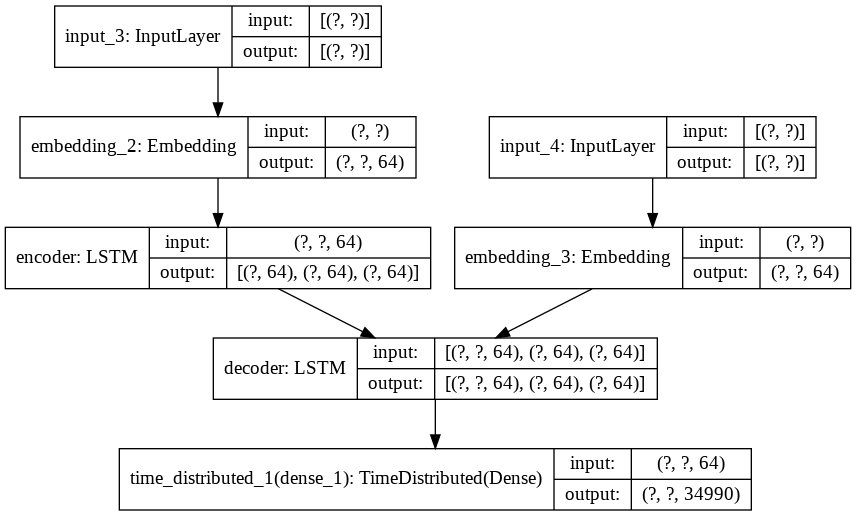

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [36]:
from tensorflow.keras import metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[metrics.sparse_categorical_accuracy])

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint
model.fit(x = [english_inputs, german_inputs], y = y_train,
          batch_size=128, epochs=1,
          validation_data=([english_inputs_val, german_inputs_val], y_test),
          callbacks = [ModelCheckpoint('model.h5', monitor='val_loss', mode='min', save_best_only=True)])

1641/1641 [==============================] - 1215s 740ms/step - loss: 0.8686 - sparse_categorical_accuracy: 0.9158 - val_loss: 0.5258 - val_sparse_categorical_accuracy: 0.9235


In [39]:
# Encoder inference model
enc_model = Model(enc_input, enc_state)

# Decoder inference model
state_h_in = Input(shape = (64,))
state_c_in = Input(shape = (64,))
dec_state_in = [state_h_in, state_c_in]
dec_emb_pred = dec_emb_layer(dec_input)
dec_out_pred, state_h_out, state_c_out = dec_lstm_layer(dec_emb_pred, initial_state = dec_state_in)

dec_out_pred = dec_softmax(dec_out_pred)
dec_model = Model([dec_input] + dec_state_in, [dec_out_pred, state_h_out, state_c_out])

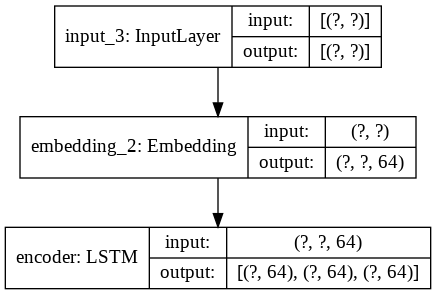

In [40]:
plot_model(enc_model, 'encoding_inference.png', show_shapes=True)

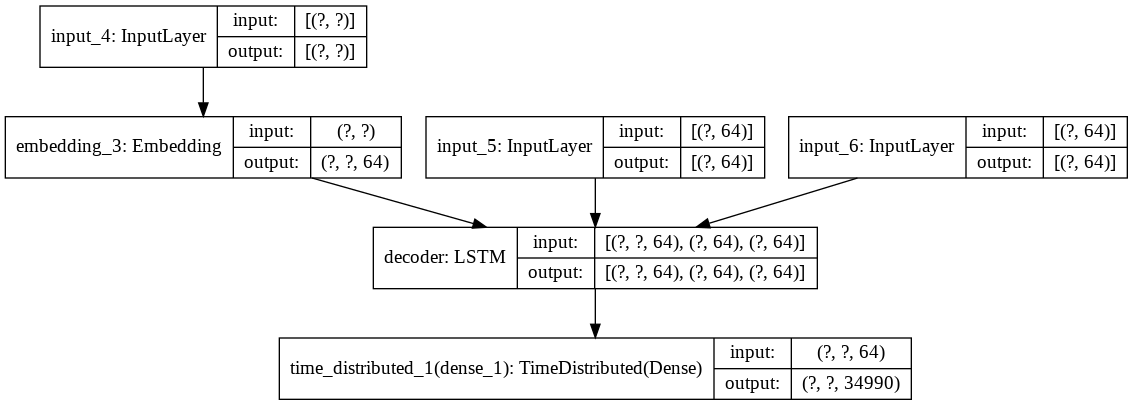

In [41]:
plot_model(dec_model, 'decoding_inference.png', show_shapes=True)

In [72]:
def predict_german(sentence):
  eng_pred = pad_sequences(english_tokenizer.texts_to_sequences([sentence]), maxlen=101, padding='post')
  dec_init = enc_model.predict(eng_pred)
  dec_word = np.array([[1]]) # token for <BOS>

  stop = False
  deu_sentence = ''
  while not stop:
    output = dec_model.predict([dec_word] + dec_init)
    output_seq = output[0]
    new_states = output[1:]
    
    new_id = np.argmax(output_seq[0, -1, :])
    print(new_id)
    new_word = german_tokenizer.index_word[new_id]

    if (new_word == 'eos' or len(deu_sentence.split()) == 77):
      stop = True
    else:
      deu_sentence += new_word + ' '

    dec_word = np.array([[new_id]])
    dec_init = new_states
  return deu_sentence

In [73]:
predict_german('What are you'.lower())

[[21 23  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]]
3
20
7
5
2


'ich habe das nicht '

In [ ]:
german_tokenizer.index_word

34989